In [198]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pandas as pd
import numpy as np
import cv2
import json
import random
from keras.optimizers import Adam
from keras.models import model_from_json
from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [200]:
df = pd.read_pickle('./output/dataCleanGray.pkl')
df.head()

,sex,name,path,array
0,"[1, 0]",00001722.jpg,./input/men/00001722.jpg,"[[40, 45, 60, 74, 92, 94, 95, 107, 112, 110, 1..."
1,"[1, 0]",00001044.jpg,./input/men/00001044.jpg,"[[190, 202, 199, 211, 196, 175, 215, 50, 51, 5..."
2,"[1, 0]",00001291.png,./input/men/00001291.png,"[[132, 132, 130, 132, 131, 129, 178, 178, 178,..."
3,"[1, 0]",00001050.jpg,./input/men/00001050.jpg,"[[198, 158, 36, 28, 17, 13, 41, 43, 32, 25, 21..."
4,"[1, 0]",00001736.jpg,./input/men/00001736.jpg,"[[255, 255, 255, 255, 253, 252, 253, 181, 40, ..."


In [201]:
X = np.stack(df['array'])
y = np.stack(df['sex'])

In [204]:
X.shape

(5620, 60, 60)

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4496, 60, 60) (1124, 60, 60) (4496, 2) (1124, 2)


In [206]:
# Prepare data to feed the NN
num_classes = 2
img_rows, img_cols, img_channels = 60, 60, 1

# Ask keras which format to use depending on used backend and arrange data as expected
if K.image_data_format() == 'channels_first':
    X_train = x_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = x_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
'''# Incoming data is in uint8. Cast the input data images to be floats in range [0.0-1.0]  
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)'''

"# Incoming data is in uint8. Cast the input data images to be floats in range [0.0-1.0]  \nX_train = X_train.astype('float32') / 255\nX_test = X_test.astype('float32') / 255\n\nprint('x_train shape:', X_train.shape)\nprint(X_train.shape[0], 'train samples')\nprint(X_test.shape[0], 'test samples')\n\n# convert class vectors to binary class matrices\ny_train = keras.utils.to_categorical(y_train, num_classes)\ny_test = keras.utils.to_categorical(y_test, num_classes)"

In [207]:
## This is the neural network proposed architecture
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(60,60,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
              


In [208]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(60, 60 ,1), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 20
lrate = 0.01
decay = lrate/epochs
adam = Adam(decay=decay)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model.summary())


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 60, 60, 64)        640       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
dropout_10 (Dropout)         (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 30, 30, 128)       73856     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 30, 30, 128)      

# Fitting model

In [9]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs,verbose=1, batch_size=50)

Train on 4496 samples, validate on 1124 samples
Epoch 1/20
4496/4496 [==============================] - 576s 128ms/step - loss: 1.6529 - accuracy: 0.5983 - val_loss: 1.8757 - val_accuracy: 0.6014
Epoch 2/20
4496/4496 [==============================] - 551s 122ms/step - loss: 0.9248 - accuracy: 0.6430 - val_loss: 1.4771 - val_accuracy: 0.6335
Epoch 3/20
4496/4496 [==============================] - 537s 119ms/step - loss: 0.5680 - accuracy: 0.7028 - val_loss: 0.5195 - val_accuracy: 0.7420
Epoch 4/20
4496/4496 [==============================] - 533s 119ms/step - loss: 0.5137 - accuracy: 0.7338 - val_loss: 0.5318 - val_accuracy: 0.7144
Epoch 5/20
4496/4496 [==============================] - 569s 126ms/step - loss: 0.4549 - accuracy: 0.7751 - val_loss: 0.4670 - val_accuracy: 0.7874
Epoch 6/20
4496/4496 [==============================] - 575s 128ms/step - loss: 0.4019 - accuracy: 0.8125 - val_loss: 0.4918 - val_accuracy: 0.7589
Epoch 7/20
4496/4496 [==============================] - 537s 120

In [ ]:

model = build(60, 60, 2)


In [ ]:

# Fit the NN
batch_size = 20
epochs = 10

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))


#### model accuracy

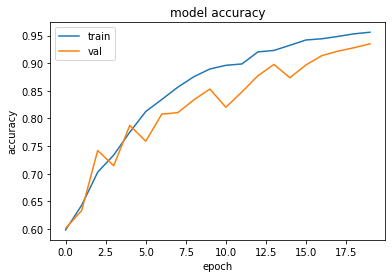

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### model loss

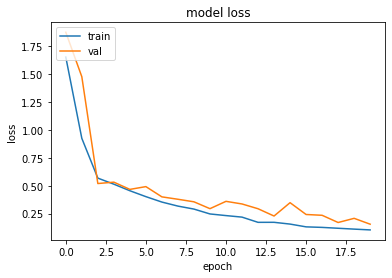

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Testing model

In [12]:
scores = model.evaluate(X_test, y_test, verbose = 0)

print('Accuracy: %.2f%%' % (scores[1] * 100))
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Accuracy: 93.51%
Test loss: 0.15504288941197547
Test accuracy: 0.9350534081459045


# Saving model 

In [16]:
mod = 'model_sequential'
model.save(mod + '.h5')

In [17]:
model_json = model.to_json()
with open(mod + '.json', "w") as json_file:
    json.dump(model_json, json_file)

model.save_weights(mod)

# Prediction

In [55]:
class_names = ('man','woman')

In [174]:
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1)

0
0


In [177]:
print(Y_pred_classes)
print(Y_true)

[0 0 1 ... 0 0 1]
[0 0 1 ... 0 0 1]


In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

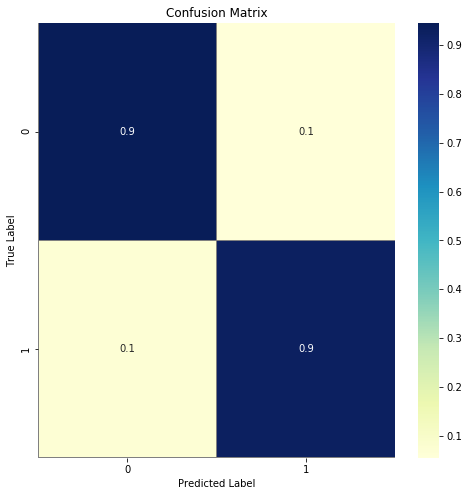

In [60]:
cm = confusion_matrix(Y_true, Y_pred_classes)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="YlGnBu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Load model

In [61]:
with open('./model_sequential.json','r') as f:
    model_json = json.load(f)
    
model = model_from_json(model_json)

model.load_weights('./model_sequential.h5')

#### Predict with test

In [185]:
random_indices = [random.randint(0, len(X_test))][0]
random_indices

664

[1.2119617e-05 9.9998784e-01]
Probs 
man - 0.00001 
woman - 0.99999


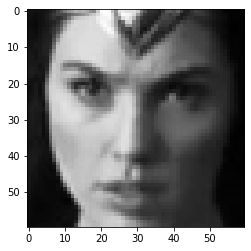

In [186]:
img = X_test[random_indices]
pred = model.predict(np.expand_dims(img,axis=0))[0]
print(pred)
print('Probs \nman - {0:.5f} \nwoman - {1:.5f}'.format(pred[0],pred[1]))

plt.imshow(Image.fromarray(img.squeeze()*255), cmap='Greys', interpolation='none')

#### Predict with outside

In [187]:
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [188]:
def cleanData(img):
    '''
    Reconoce el rostro de personas sobre imágenes:
    - Crea una sección que encuadra el rostro.
    - Transforma la imagen a escala de grises.
    - Reescala la imagen a 48x48.
    - Traduce la información del cuadrante a np.array.
    
    En el caso de no reconocer ningun rostro devuelve /no.
    '''
    try:
        image = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
        face_p = faceCascade.detectMultiScale(
            image,
            scaleFactor=1.1,
            minNeighbors=5
        )

        (x, y, w, h) = face_p[0]

        crop_image = image[y:y+h,x:x+w]

        img_data=cv2.resize(crop_image,(60,60))
        
        img_data = np.stack(img_data)
        img_data = img_data / 255.0
        
    except Exception as e:
        return 'no -> ', e
    
    return img_data

#### Pruf man

[0.78537863 0.2146214 ]
(1, 60, 60, 1)
Probs 
man - 0.78538 
woman - 0.21462


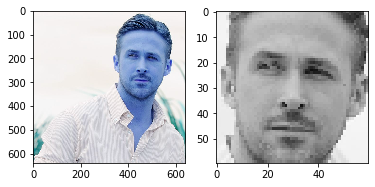

In [191]:
pruf = cleanData('./input/lead-short-summer-haircut-gettyimages-492416565-1556829330.jpg')
input_pruf = cv2.imread('./input/lead-short-summer-haircut-gettyimages-492416565-1556829330.jpg')

plt.subplot(121)
plt.imshow(input_pruf)
plt.subplot(122)
plt.imshow(Image.fromarray(pruf.squeeze()*255.0))

pruf = np.expand_dims(pruf,axis=0).reshape(np.expand_dims(pruf,axis=0).shape[0], 60, 60, 1)
pred0 = model.predict(pruf)[0]
print(pred0)

print('Probs \nman - {0:.5f} \nwoman - {1:.5f}'.format(pred0[0],pred0[1]))

#### Pruf woman

[0.7858437  0.21415627]
Probs 
man - 0.78584 
woman - 0.21416


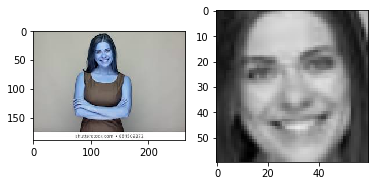

In [197]:
pruf = cleanData('./input/descarga.jpeg')
input_pruf = cv2.imread('./input/descarga.jpeg')

plt.subplot(121)
plt.imshow(input_pruf)
plt.subplot(122)
plt.imshow(Image.fromarray(pruf.squeeze()*255))

pruf = np.expand_dims(pruf,axis=0).reshape(np.expand_dims(pruf,axis=0).shape[0], 60, 60, 1)
pred1 = model.predict(pruf)[0]
print(pred1)

print('Probs \nman - {0:.5f} \nwoman - {1:.5f}'.format(pred1[0],pred1[1]))

# Por qué cojones no funciona...

In [ ]:
randomSex = [random.randint(0, len(X_test)) for i in range(9)]

In [ ]:
plt.figure(figsize=(10,10))

for i, index in enumerate(randomSex):
    pred = predictions[index]
    pred = 'man' if pred==0 else 'woman'
    actual = 'man' if y_test[index]==0 else 'woman'
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[index], cmap='gray', interpolation='none')
    plt.title(f"Predicted: {pred}, \n Class: {actual}")
    plt.tight_layout()